In [104]:
import pandas as pd
# Loading Data in Pandas Data Frames
trainDF=pd.read_csv('../train.csv',index_col=0)
testDF=pd.read_csv('../test.csv',index_col=0)
# trainDF.location=trainDF.location.apply(lambda x: int(x.split(' ')[1]))
# testDF.location=testDF.location.apply(lambda x: int(x.split(' ')[1]))
# trainDF.describe()
trainDF.head()

,location,fault_severity
id,,
14121,location 118,1
9320,location 91,0
14394,location 152,1
8218,location 931,1
14804,location 120,0


In [105]:
#merge test and train
data=pd.concat([trainDF,testDF],axis=0)
data[data.fault_severity.isnull()].head()

,fault_severity,location
id,,
11066,NaN,location 481
18000,NaN,location 962
16964,NaN,location 491
4795,NaN,location 532
3392,NaN,location 600


In [106]:
data.head()

,fault_severity,location
id,,
14121,1,location 118
9320,0,location 91
14394,1,location 152
8218,1,location 931
14804,0,location 120


In [107]:
data.shape

(18552, 2)

In [108]:
eventTypeDF=pd.read_csv('../event_type.csv',index_col=0)
logFeatureDF=pd.read_csv('../log_feature.csv',index_col=0)
resourceTypeDF=pd.read_csv('../resource_type.csv',index_col=0)
severityTypeDF=pd.read_csv('../severity_type.csv',index_col=0)

In [109]:
logFeatureDF.volume=logFeatureDF.volume.apply(lambda x: int(x))
logFeatureDF.sort_index().head()

,log_feature,volume
id,,
1,feature 179,1
1,feature 68,2
1,feature 345,2
2,feature 312,1
2,feature 233,1


In [110]:
eventTypeVect=pd.get_dummies(eventTypeDF).groupby(eventTypeDF.index).sum()
logFeatureVect=pd.get_dummies(logFeatureDF).groupby(logFeatureDF.index).sum()
resourceTypeVect=pd.get_dummies(resourceTypeDF).groupby(resourceTypeDF.index).sum()
severityTypeVect=pd.get_dummies(severityTypeDF).groupby(severityTypeDF.index).sum()

In [111]:
data=data.join(eventTypeVect).join(logFeatureVect).join(resourceTypeVect).join(severityTypeVect)

In [112]:
data.location=data.location.apply(lambda x: int(x.split(' ')[1]))

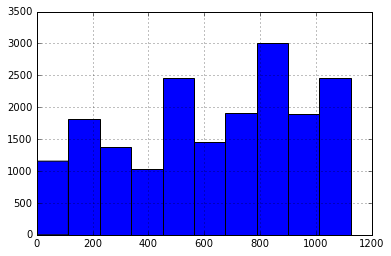

In [113]:
%matplotlib inline
data.location.hist()

In [114]:
bins=range(0,1300,100)
names=range(0,12,1)
data['loc_cat']=pd.cut(data.location,bins,labels=names)
data.head()

,fault_severity,location,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,...,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9,severity_type_severity_type 1,severity_type_severity_type 2,severity_type_severity_type 3,severity_type_severity_type 4,severity_type_severity_type 5,loc_cat
id,,,,,,,,,,,,,,,,,,,,,
14121,1,118,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9320,0,91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14394,1,152,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8218,1,931,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,9
14804,0,120,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [115]:
data['index1']=data.index
loc=data.indexdata.groupby('location').count()[['index1']]

AttributeError: 'DataFrame' object has no attribute 'indexdata'

AttributeError: 'DataFrame' object has no attribute 'indexdata'

In [89]:
df=pd.get_dummies(data.loc_cat,prefix='loc_cat')
df.head()

,loc_cat_0,loc_cat_1,loc_cat_2,loc_cat_3,loc_cat_4,loc_cat_5,loc_cat_6,loc_cat_7,loc_cat_8,loc_cat_9,loc_cat_10,loc_cat_11
id,,,,,,,,,,,,
14121,0,1,0,0,0,0,0,0,0,0,0,0
9320,1,0,0,0,0,0,0,0,0,0,0,0
14394,0,1,0,0,0,0,0,0,0,0,0,0
8218,0,0,0,0,0,0,0,0,0,1,0,0
14804,0,1,0,0,0,0,0,0,0,0,0,0


In [90]:
# data=data.join(df)
data=pd.concat([data,df], axis=1)
data.drop('loc_cat',axis=1,inplace=True)

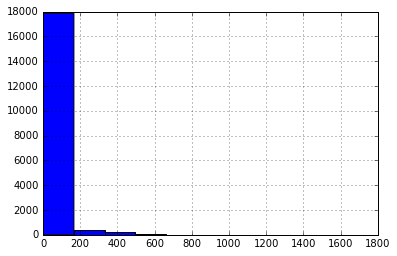

In [91]:
data.volume.hist()

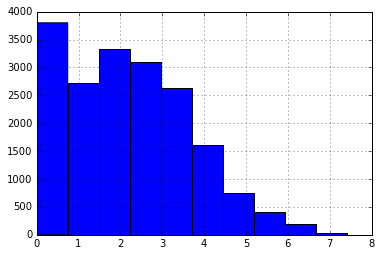

In [92]:
import numpy as np
data.volume.apply(np.log).hist()
data['volumeTransformed']=data.volume.apply(np.log)


In [93]:
bins=range(0,9,1)
names=range(0,8,1)
data['vol_trans']=pd.cut(data.volumeTransformed,bins,labels=names)
data.volumeTransformed.head()

id
14121    3.637586
9320     5.755742
14394    0.693147
8218     3.091042
14804    2.484907
Name: volumeTransformed, dtype: float64

In [94]:
df=pd.get_dummies(data.vol_trans,prefix='vol_trans')
df.head()

,vol_trans_0,vol_trans_1,vol_trans_2,vol_trans_3,vol_trans_4,vol_trans_5,vol_trans_6,vol_trans_7
id,,,,,,,,
14121,0,0,0,1,0,0,0,0
9320,0,0,0,0,0,1,0,0
14394,1,0,0,0,0,0,0,0
8218,0,0,0,1,0,0,0,0
14804,0,0,1,0,0,0,0,0


In [95]:
data=pd.concat([data,df], axis=1)
data.drop(['vol_trans','volumeTransformed'],axis=1,inplace=True)

In [67]:
data.head()

,fault_severity,location,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,...,loc_cat_10,loc_cat_11,vol_trans_0,vol_trans_1,vol_trans_2,vol_trans_3,vol_trans_4,vol_trans_5,vol_trans_6,vol_trans_7
id,,,,,,,,,,,,,,,,,,,,,
14121,1,118,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9320,0,91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14394,1,152,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8218,1,931,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
14804,0,120,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:
testDF=data[data.fault_severity.isnull()]
trainDF=data[data.fault_severity.notnull()]

In [69]:
trainDF.head()

,fault_severity,location,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,...,loc_cat_10,loc_cat_11,vol_trans_0,vol_trans_1,vol_trans_2,vol_trans_3,vol_trans_4,vol_trans_5,vol_trans_6,vol_trans_7
id,,,,,,,,,,,,,,,,,,,,,
14121,1,118,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9320,0,91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14394,1,152,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8218,1,931,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
14804,0,120,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
data.head()
# data.groupby('location').count()[['id']]

,fault_severity,location,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,...,loc_cat_10,loc_cat_11,vol_trans_0,vol_trans_1,vol_trans_2,vol_trans_3,vol_trans_4,vol_trans_5,vol_trans_6,vol_trans_7
id,,,,,,,,,,,,,,,,,,,,,
14121,1,118,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9320,0,91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14394,1,152,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8218,1,931,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
14804,0,120,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [339]:
X=trainDF
X=X.drop(['location','volume','fault_severity'],axis=1)
X=X.as_matrix()
Y=trainDF.fault_severity
Y=Y.as_matrix()

In [340]:
X_test=testDF
X_test=X_test.drop(['location','volume','fault_severity'],axis=1)
X_test=X_test.as_matrix()

In [341]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier

In [48]:
clf = MultinomialNB()
# clf=DecisionTreeClassifier(criterion="entropy")
# clf=RandomForestClassifier(n_estimators=10,criterion="gini")
print "training classifier ..."
clf.fit(X,Y)

NameError: name 'MultinomialNB' is not defined

In [343]:
print "performing cross fold validation ..."
predicted = cross_validation.cross_val_predict(clf, X, Y, cv=5)

performing cross fold validation ...


In [344]:
print "accuracy score: ", metrics.accuracy_score(Y, predicted)
print "precision score: ", metrics.precision_score(Y, predicted,average='weighted')
print "recall score: ", metrics.recall_score(Y, predicted,average='weighted')

accuracy score:  0.701124508874
precision score:  0.688836274518
recall score:  0.701124508874


In [345]:
print "classification_report: \n ", metrics.classification_report(Y, predicted)

classification_report: 
               precision    recall  f1-score   support

        0.0       0.80      0.85      0.82      4784
        1.0       0.49      0.44      0.46      1871
        2.0       0.46      0.41      0.43       726

avg / total       0.69      0.70      0.69      7381



In [346]:
print "confusion_matrix:\n ", metrics.confusion_matrix(Y,predicted)

confusion_matrix:
  [[4061  581  142]
 [ 848  818  205]
 [ 158  272  296]]


In [242]:
# X_test.shape
Y_test=clf.predict_proba(X_test)

In [243]:
# create submission
submission = pd.DataFrame(Y_test,columns=['predict_0','predict_1','predict_2'])
submission.head()
submission['id']=testDF.index.values
cols=submission.columns.tolist()
cols=cols[-1:] + cols[:-1]
submission=submission[cols]
submission.to_csv(open('submission.csv','wt'),index=False)

In [108]:
submission.head()

,id,predict_0,predict_1,predict_2
0,11066,0.897315,0.102685,0.000000
1,18000,0.434138,0.146182,0.419681
2,16964,1.000000,0.000000,0.000000
3,4795,0.800000,0.200000,0.000000
4,3392,0.211760,0.386742,0.401498


SyntaxError: invalid syntax (<ipython-input-143-d0f862b98f8e>, line 1)